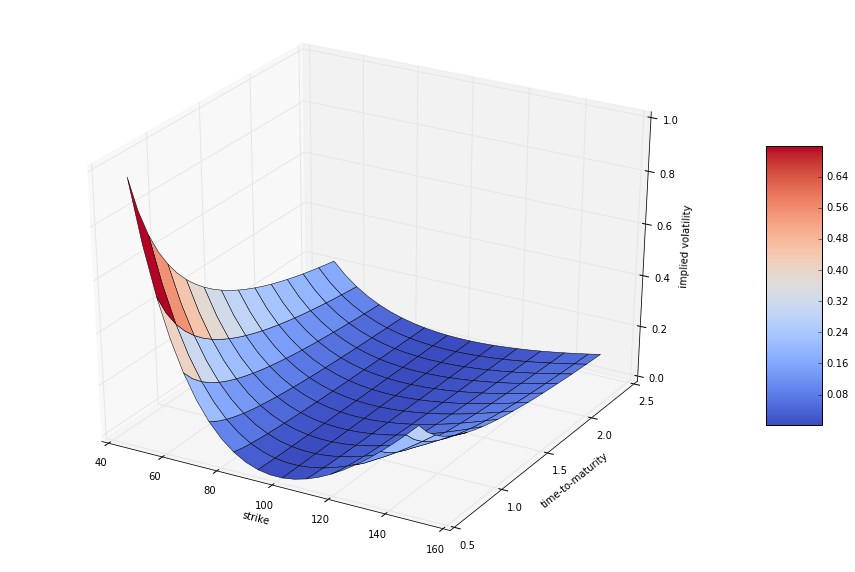

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
strike = np.linspace(50,150,24) #创建50到150的线性数组，line不含e
ttm = np.linspace(0.5,2.5,25) #创建time to matirity的数组
strike,ttm = np.meshgrid(strike,ttm) #将两个一维数组结合，构成二维数组
#本来，strike只是以一位数组，即50到150的一串数字。在经过meshgrid与ttm合并后，就变成二维数字，重复n行，每行都是这24个数字。
#n也是ttm中包含元素的数量。这样strike，ttm才能交叉成行二维数组。
iv = (strike - 100) ** 2 / (100 * strike) / ttm #假设implied volatility是这么算
fig = plt.figure(figsize=(16,10)) #figure返回的是图形窗口
ax = fig.gca(projection='3d')#返回当前axes的句柄。 figure--图形的窗口， axes--返回图形的轴
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True) #画“面”surf。
#命令是从轴出发，从ax.plot_surface，来画图。设置标签也是从轴出发
#rstride=2,  array row stride 步幅
#cstride=2, array column stride
#cmap=plt.cm.coolwarm a colormap for the surface patches
#linewidth=0.5, 
#antialiased=True
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.grid(True)


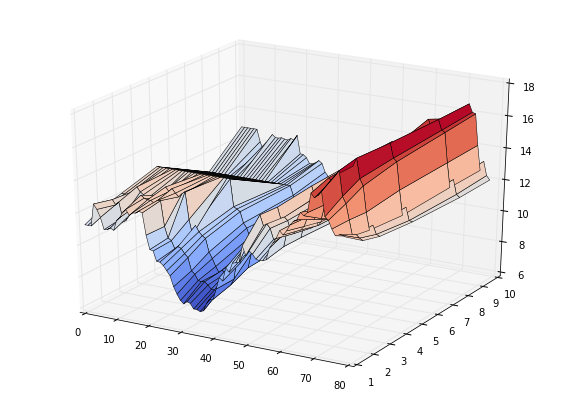

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import warnings; warnings.simplefilter('ignore')
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import datetime
%matplotlib inline
df = pd.read_csv('./data/yield_curve_br.csv', header=0)
df.columns = ['date',1,2,3,5,8,10]
df_desc = df.sort_index(ascending=False)
df_desc.index = range(79)
del df_desc['date']
axis = range(79)
ayis = [1,2,3,5,8,10]
axis, ayis = np.meshgrid(axis, ayis)
zv = np.array([df_desc[y][x] for x, y in zip(np.ravel(axis), np.ravel(ayis))])
Z = zv.reshape(axis.shape)
fig = plt.figure(figsize=(10,7)) #figure返回的是图形窗口
ax = fig.gca(projection='3d')#返回当前axes的句柄。 figure--图形的窗口， axes--返回图形的轴
ax.view_init(25, 300) 
surf = ax.plot_surface(axis, ayis, Z,rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True )
dtime = pd.date_range('2010-01-01', periods=80, freq='M')
start = datetime.datetime(2010, 01, 01)
end = datetime.datetime(2016, 07, 01)
#ax.set_xlim(start, end)